In [ ]:
!pip install kaggle

  Using cached kaggle-1.6.17-py3-none-any.whl
  Using cached certifi-2024.8.30-py3-none-any.whl.metadata (2.2 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached bleach-6.2.0-py3-none-any.whl.metadata (30 kB)
  Using cached charset_normalizer-3.4.0-cp312-cp312-win_amd64.whl.metadata (34 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
Using cached certifi-2024.8.30-py3-none-any.whl (167 kB)
Using cached bleach-6.2.0-py3-none-any.whl (163 kB)
Using cached requests-2.32.3-py3-none-any.whl (64 kB)
Using cached charset_normalizer-3.4.0-cp312-cp312-win_amd64.whl (102 kB)
Using cached idna-3.10-py3-none-any.whl (70 kB)


ERROR: Could not install packages due to an OSError: [WinError 2] The system cannot find the file specified: 'C:\\Python312\\Scripts\\normalizer.exe' -> 'C:\\Python312\\Scripts\\normalizer.exe.deleteme'


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import cv2
import zipfile
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib.image as img
import tensorflow.keras.backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from pylab import imread,subplot,imshow,show

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d fanconic/skin-cancer-malignant-vs-benign -p /content

Dataset URL: https://www.kaggle.com/datasets/fanconic/skin-cancer-malignant-vs-benign
License(s): unknown
100% 325M/325M [00:11<00:00, 33.8MB/s]
100% 325M/325M [00:11<00:00, 28.6MB/s]


In [ ]:
with zipfile.ZipFile("/content/skin-cancer-malignant-vs-benign.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/data")

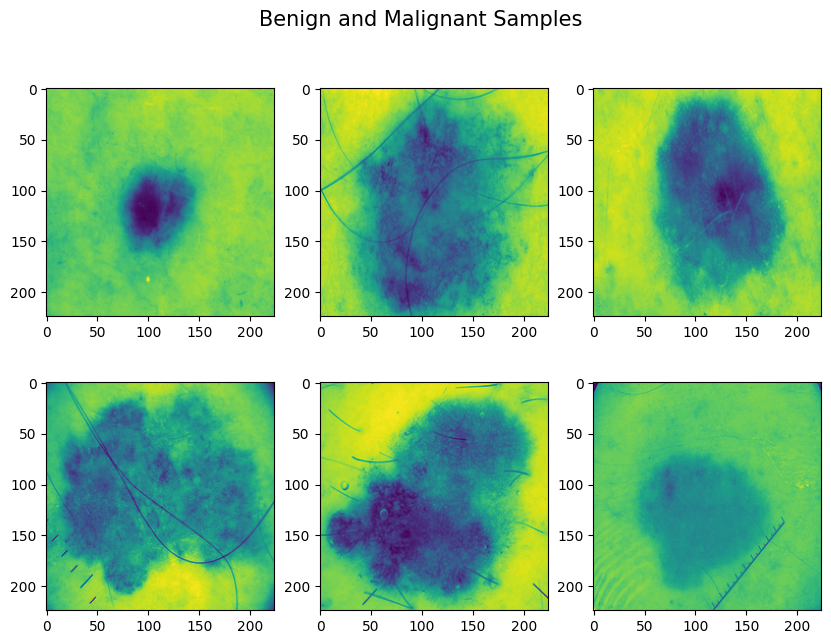

In [ ]:
path = r'/content/data/test/benign/211.jpg'
Image1 = cv2.imread(path, 0)
path_1 = r'/content/data/test/benign/758.jpg'
Image2 = cv2.imread(path_1, 0)
path_2 = r'/content/data/train/benign/180.jpg'
Image3 = cv2.imread(path_2, 0)
path_3 = r'/content/data/train/malignant/71.jpg'
Image4 = cv2.imread(path_3, 0)
path_4 = r'/content/data/test/malignant/1007.jpg'
Image5 = cv2.imread(path_4, 0)
path_5 = r'/content/data/test/malignant/511.jpg'
Image6 = cv2.imread(path_5, 0)

fig, axs = plt.subplots(2, 3, figsize=(10, 7))

axs[0, 0].imshow(Image1)
axs[0, 1].imshow(Image2)
axs[0, 2].imshow(Image3)
axs[1, 0].imshow(Image4)
axs[1, 1].imshow(Image5)
axs[1, 2].imshow(Image6)

fig.suptitle('Benign and Malignant Samples',fontsize=15)

plt.show()

In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
train_path = '/content/data/train/'
val_path = '/content/data/train/'
test_path = '/content/data/test/'

# Load the datasets
train_data = image_dataset_from_directory(
    train_path,
    validation_split=0.25,
    image_size=(224, 224),
    batch_size=35,
    subset='training',
    seed=50
)

val_data = image_dataset_from_directory(
    val_path,
    validation_split=0.25,
    image_size=(224, 224),
    batch_size=35,
    subset='validation',
    seed=50
)

test_data = image_dataset_from_directory(
    test_path,
    image_size=(224, 224),
    batch_size=35,
    seed=50
)

Found 2637 files belonging to 2 classes.
Using 1978 files for training.
Found 2637 files belonging to 2 classes.
Using 659 files for validation.
Found 660 files belonging to 2 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout, Flatten
import tensorflow as tf

# Resize the images to a smaller size to reduce memory usage
new_image_size = (64, 64)
train_data_small = train_data.map(lambda x, y: (tf.image.resize(x, new_image_size), y))
val_data_small = val_data.map(lambda x, y: (tf.image.resize(x, new_image_size), y))
test_data_small = test_data.map(lambda x, y: (tf.image.resize(x, new_image_size), y))

# Flatten the data to a sequence for RNN compatibility
train_data_small = train_data_small.map(lambda x, y: (tf.reshape(x, (-1, 64 * 64 * 3)), y))
val_data_small = val_data_small.map(lambda x, y: (tf.reshape(x, (-1, 64 * 64 * 3)), y))
test_data_small = test_data_small.map(lambda x, y: (tf.reshape(x, (-1, 64 * 64 * 3)), y))

# Define a simpler RNN model
model_rnn = Sequential()
model_rnn.add(SimpleRNN(32, activation='relu', input_shape=(64 * 64 * 3, 1), return_sequences=False))
model_rnn.add(Dropout(0.2))
model_rnn.add(Dense(50, activation='relu'))
model_rnn.add(Dense(2, activation='softmax'))

# Compile the model
model_rnn.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Model summary
model_rnn.summary()

# Train the model
history_rnn = model_rnn.fit(
    train_data_small,
    epochs=5,  # Reduced epochs to further save memory
    validation_data=val_data_small
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 32)                  │           1,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 50)                  │           1,650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             102 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,840 (11.09 KB)

 Trainable params: 2,840 (11.09 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 110s 2s/step - accuracy: 0.4678 - loss: 4.8459 - val_accuracy: 0.6328 - val_loss: 0.6868
Epoch 2/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.5638 - loss: 1.4470 - val_accuracy: 0.6616 - val_loss: 0.6129
Epoch 3/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 110s 2s/step - accuracy: 0.6022 - loss: 0.9898 - val_accuracy: 0.6995 - val_loss: 0.6613
Epoch 4/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 136s 2s/step - accuracy: 0.6273 - loss: 0.8989 - val_accuracy: 0.6844 - val_loss: 0.5820
Epoch 5/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 109s 2s/step - accuracy: 0.6425 - loss: 0.8648 - val_accuracy: 0.6874 - val_loss: 0.5838


In [ ]:
# Apply the same transformations to the validation data before evaluation
val_data_resized = val_data.map(lambda x, y: (tf.image.resize(x, new_image_size), y))
val_data_flattened = val_data_resized.map(lambda x, y: (tf.reshape(x, (-1, 64 * 64 * 3)), y))

# Evaluate the model with the transformed validation data
model_rnn.evaluate(val_data_flattened)

19/19 ━━━━━━━━━━━━━━━━━━━━ 13s 693ms/step - accuracy: 0.6745 - loss: 0.5994


[0.5838347673416138, 0.6874051690101624]